# EDA on Customer bookings data

In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bhush\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [7]:
df = pd.read_csv("D:\Bhushan\Data Science\ML\British Airways\Data\customer_booking.csv",encoding="ISO-8859-1")

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
df.shape

(50000, 14)

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## Sales Channel

In [22]:
per_internet=df.sales_channel.value_counts().values[0] / df.sales_channel.count()*100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

In [24]:
print(f"Number of bookings done through internet: {per_internet} %.")
print(f"Number of bookings done through phone Call: {per_mobile} %.")

Number of bookings done through internet: 88.764 %.
Number of bookings done through phone Call: 11.236 %.


## Trip Type

In [25]:
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [28]:
per_RoundTrip=df.trip_type.value_counts().values[0] / df.trip_type.count()*100
per_OneWay = df.trip_type.value_counts().values[1]  / df.trip_type.count() *100
per_Circle_Trip=df.trip_type.value_counts().values[2] / df.trip_type.count()*100

In [30]:
print(f"Percentage of round trips: {per_RoundTrip} %")
print(f"Percentage of oneWay trips: {per_OneWay} %")
print(f"Percentage of circle trips: {per_Circle_Trip} %")

Percentage of round trips: 98.994 %
Percentage of oneWay trips: 0.774 %
Percentage of circle trips: 0.232 %


## Purchase Lead

<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

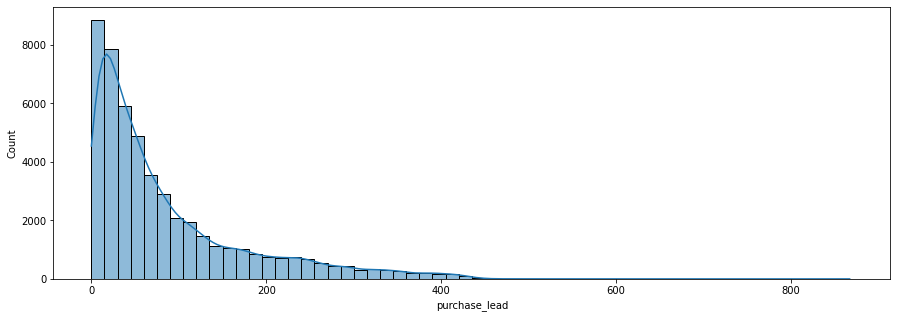

In [38]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=15,kde=True)

In [40]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

If we assume that no customer is booking in advance of more than 1 and half year we will remove all entries with purchase_lead more than 600 days.

In [41]:
df = df[df.purchase_lead <600 ]

In [43]:
df.shape

(49992, 14)

## Length Of Stay

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

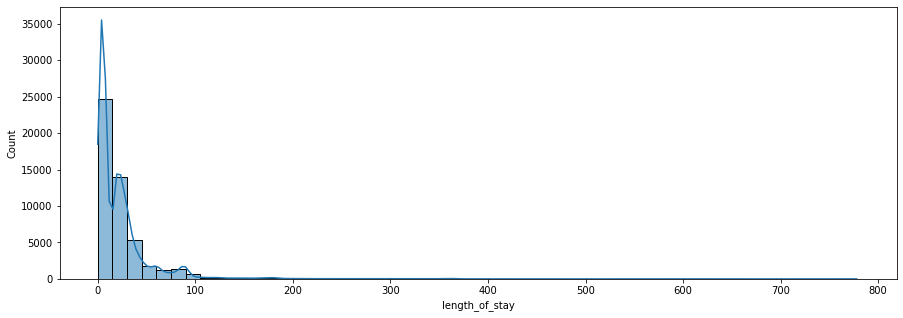

In [48]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x="length_of_stay",binwidth=15,kde=True)

In [50]:
(df['length_of_stay']>200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [55]:
df[df['length_of_stay']>500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

In [82]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]
df.shape

(49982, 14)

## Flight Day

We will map the flight day with a number of a week.

In [57]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

C:\Users\bhush\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [58]:
df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Most of the Customers want to travel on Monday and choose saturday as least preffered day as flight day.

## Booking Origin

Text(0, 0.5, 'Number of bookings')

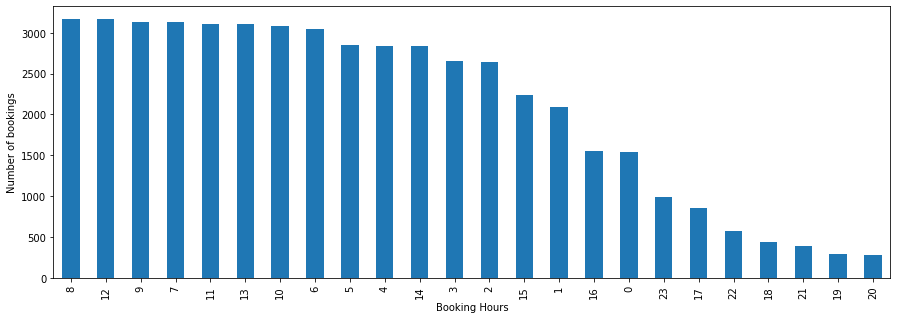

In [62]:
plt.figure(figsize=(15,5))
ax = df.flight_hour.value_counts().plot(kind="bar")
ax.set_xlabel("Booking Hours")
ax.set_ylabel("Number of bookings")

We can see most of the bookings done by customer are between 6AM to 13 PM.

 ##   Booking Origins

Text(0, 0.5, 'Number of Bookings')

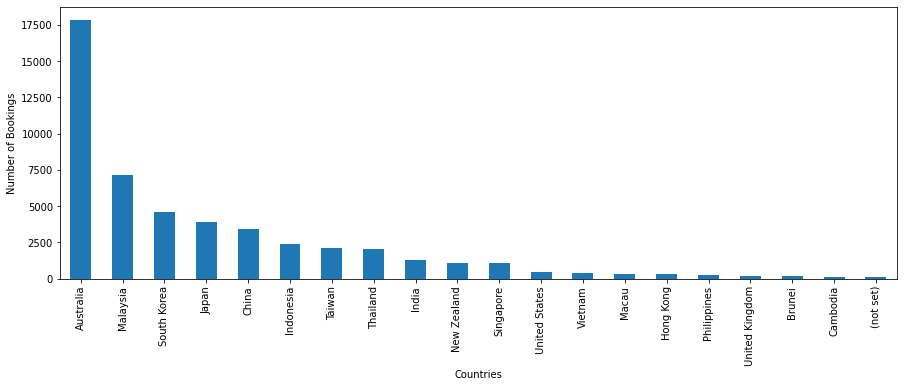

In [63]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of Bookings")

Above chart shows travellers from which country had maximum booking applications.

Text(0, 0.5, 'Number of complete bookings')

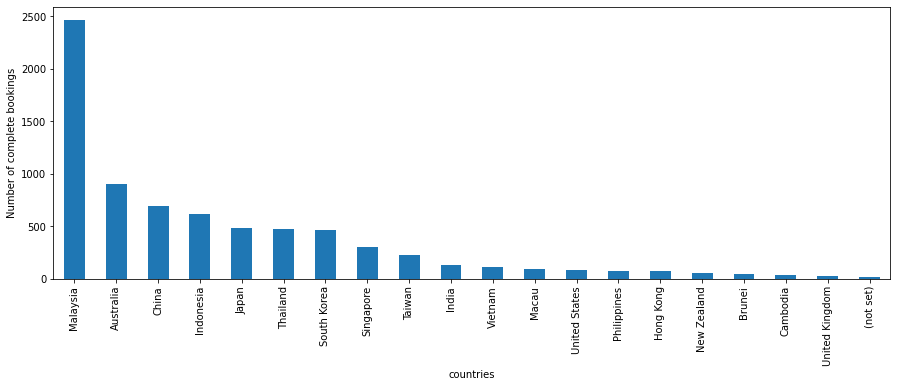

In [69]:
plt.figure(figsize=(15,5))
ax=df[df.booking_complete==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("countries")
ax.set_ylabel("Number of complete bookings")

Above chart shows travellers from which country had their booking complete.

In [83]:
InCompleted_Bookings=df.booking_complete.value_counts().values[0]/df.shape[0]*100
complete_Bookings=df.booking_complete.value_counts().values[1]/df.shape[0]*100

In [85]:
print(f"Out of 49982 bookings only {round(complete_Bookings,2)} % bookings were completed or successful")

Out of 49982 bookings only 14.96 % bookings were completed or successful


## Export Dataset to CSV

In [86]:
cwd = os.getcwd()
df.to_csv(cwd + "/filtered_customer_booking.csv")